In [41]:
import requests
import csv

def get_trending_languages():
    api_url = "https://api.stackexchange.com/2.3/tags"
    
    # Parameters for the API request
    params = {
        'order': 'desc',
        'sort': 'popular',
        'site': 'stackoverflow'
    }

    try:
        # Make the API request
        response = requests.get(api_url, params=params)
        response.raise_for_status()  # Check for errors in the response

        # Parse the JSON response
        data = response.json()
        programming_languages = ['python', 'javascript', 'java', 'c#','c++','jquery','c' 'ruby', 'swift', 'php', 'html', 'r']

        # Extract tag names and their counts
        tag_data = [(tag['name'], tag['count']) for tag in data['items'] if tag['name'].lower() in programming_languages]

        return tag_data

    except requests.exceptions.RequestException as e:
        print(f"Error making API request: {e}")
        return None

def save_to_csv(data, filename='trending_languages.csv'):
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Tag', 'Count']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write the header
        writer.writeheader()

        # Write the data
        for tag, count in data:
            writer.writerow({'Tag': tag, 'Count': count})

if __name__ == "__main__":
    trending_languages_data = get_trending_languages()

    if trending_languages_data:
        print("Trending programming languages on Stack Overflow:")
        for idx, (language, count) in enumerate(trending_languages_data, start=1):
            print(f"{idx}. {language} ; Number of questions: {count})")
            if idx == 10:
                break

        # Save data to CSV file
        save_to_csv(trending_languages_data)
        print("Data saved to 'trending_languages.csv'")
    else:
        print("Failed to retrieve trending languages.")


Trending programming languages on Stack Overflow:
1. javascript ; Number of questions: 2515672)
2. python ; Number of questions: 2169441)
3. java ; Number of questions: 1908984)
4. c# ; Number of questions: 1604518)
5. php ; Number of questions: 1461896)
6. html ; Number of questions: 1182116)
7. jquery ; Number of questions: 1034682)
8. c++ ; Number of questions: 800637)
9. r ; Number of questions: 498719)
10. swift ; Number of questions: 330727)
Data saved to 'trending_languages.csv'


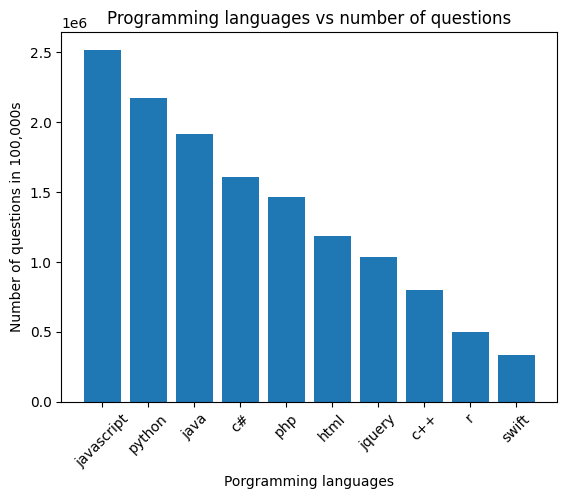

In [45]:
langs, questions = zip(*trending_languages_data[:10])

    
# Create a bar chart
plt.bar(lang, questions)
plt.ylabel('Number of questions in 100,000s')
plt.xlabel('Porgramming languages')
plt.title('Programming languages vs number of questions')
plt.xticks(rotation=45)
plt.show()

In [24]:
import requests
API_KEY = 'Gf6ix5bxgt792ww55Xff9g(('
BASEURL = "https://api.stackexchange.com/2.3/tags/javascript/faq"

params = {
  "site" : "stackoverflow",
  "key" : API_KEY  
  }

r = requests.get(BASEURL, params=params)

print(r.json())

{'items': [{'tags': ['javascript', 'ajax', 'asynchronous'], 'owner': {'account_id': 76141, 'reputation': 797857, 'user_id': 218196, 'user_type': 'registered', 'accept_rate': 100, 'profile_image': 'https://i.stack.imgur.com/4P5DY.jpg?s=256&g=1', 'display_name': 'Felix Kling', 'link': 'https://stackoverflow.com/users/218196/felix-kling'}, 'is_answered': True, 'view_count': 2087781, 'protected_date': 1554698603, 'accepted_answer_id': 14220323, 'answer_count': 42, 'score': 6639, 'last_activity_date': 1690585441, 'creation_date': 1357664774, 'last_edit_date': 1657142999, 'question_id': 14220321, 'content_license': 'CC BY-SA 4.0', 'link': 'https://stackoverflow.com/questions/14220321/how-do-i-return-the-response-from-an-asynchronous-call', 'title': 'How do I return the response from an asynchronous call?'}, {'tags': ['javascript', 'jquery', 'events', 'unobtrusive-javascript'], 'owner': {'account_id': 13661, 'reputation': 97712, 'user_id': 27580, 'user_type': 'registered', 'accept_rate': 78, 

In [119]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

BASEURL = "https://api.stackexchange.com/2.3/tags/{}/faq"
API_KEY = 'Gf6ix5bxgt792ww55Xff9g(('

langs = ['python', 'javascript', 'java', 'c++', 'ruby', 'swift', 'php', 'html', 'css']

data_points = []

for lang in langs:
    url = BASEURL.format(lang)
    
    params = {
        "site": "stackoverflow",
        "key": API_KEY  
    }

    r = requests.get(url, params=params)

    if r.status_code == 200:
        items = r.json().get('items', [])
        for item in items:
            answer_count = item['answer_count']
            score = item['score']
            creation_date = item['creation_date']
            data_points.append({'lang': lang, 'answer_count': answer_count, 'score':score, 'creation_date': creation_date,
                               'title': item['title'], 'view_count': item['view_count']})

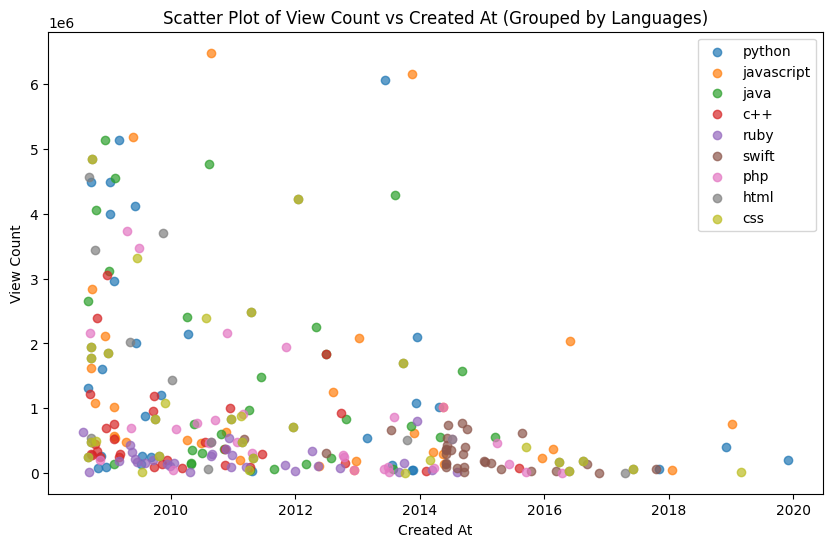

In [122]:
sorted_data = sorted(data_points, key=lambda x: x['creation_date'])
df = pd.DataFrame(sorted_data)
df['Created_At'] = pd.to_datetime(df['creation_date'], unit='s')
plt.figure(figsize=(10, 6))
for lang in langs:
    lang_df = df[df['lang'] == lang]
    plt.scatter(lang_df['Created_At'], lang_df['view_count'], label=lang, alpha=0.7)

# Set labels and title
plt.xlabel('Created At')
plt.ylabel('View Count')
plt.title('Scatter Plot of View Count vs Created At (Grouped by Languages)')
plt.legend()
plt.show()

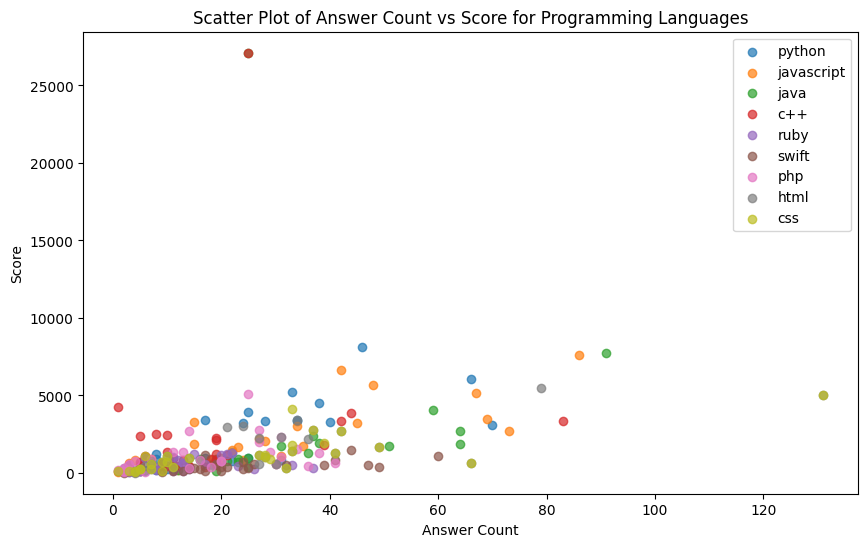

In [123]:
plt.figure(figsize=(10, 6))
for lang in langs:
    lang_df = df[df['lang'] == lang]
    plt.scatter(lang_df['answer_count'], lang_df['score'], label=lang, alpha=0.7)

plt.xlabel('Answer Count')
plt.ylabel('Score')
plt.title('Scatter Plot of Answer Count vs Score for Programming Languages')
plt.legend()
plt.show()

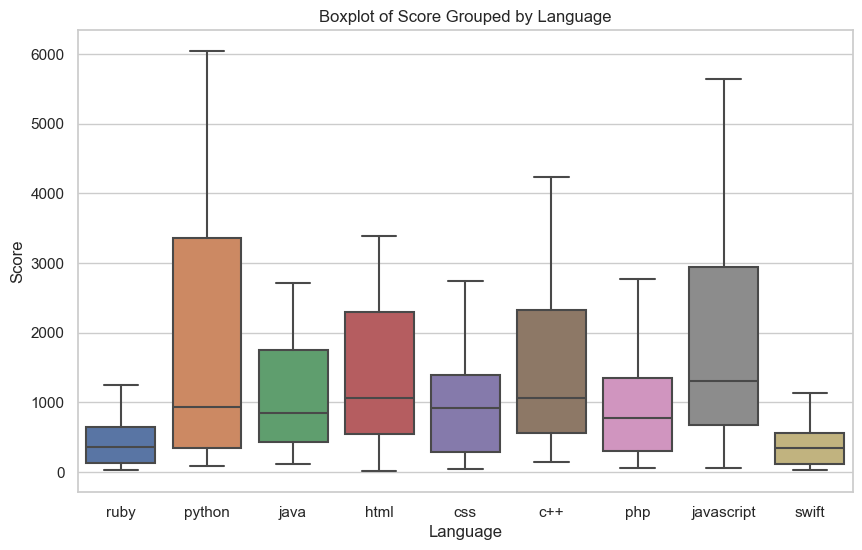

In [127]:
import seaborn as sns
sns.set(style="whitegrid")

# Plot boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='lang', y='score', data=df, showfliers=False)

# Set labels and title
plt.xlabel('Language')
plt.ylabel('Score')
plt.title('Boxplot of Scores Grouped by Language')
plt.show()